In [1]:
from qutip import *
import numpy as np
import copy
import matplotlib.pyplot as plt

In [3]:
freq = [0.0112336, 0.0113306, 0.0113997, 0.01148, 0.0116655, 0.0118678,
0.0118678, 0.0120667, 0.0122434, 0.0123182, 0.0123818, 0.0124698,
0.181, 0.182, 0.183, 0.184, 0.187, 0.19, 0.19, 0.193, 0.196, 0.197,
0.198, 0.2]

In [27]:
G = [[[2.47631232e-03,3.28299603e-10,7.65293780e-04,-1.13666350e-03
,3.51489681e-10,-9.38983896e-04,1.20676538e-10,3.51785332e-10
,5.86564153e-03,-1.50327617e-02,3.14081692e-10,-1.27538620e-02
,1.53531440e-02,-1.75194838e-10,4.73194080e-03,-7.02035440e-03,
-2.84786040e-10,2.79756000e-10,-5.80486100e-03,-4.60422730e-10
,3.63256600e-02,-9.30360080e-02,-5.65594920e-10,-7.92140000e-02],
[-1.65591128e-04,2.16184449e-05,-9.77249542e-06,1.13983657e-04
,3.44083255e-05,-6.20763081e-05,-6.31910505e-05,-3.38060667e-05
,2.62567059e-04,8.71480623e-04,-2.06461562e-05,-7.85742050e-04,
-1.02666639e-03,1.33697382e-04,-6.04251360e-05,7.03993200e-04
,2.12761120e-04,-3.90651400e-04,-3.83760100e-04,-2.08997770e-04
,1.62606500e-03,5.39348570e-03,-1.27801872e-04,-4.88022000e-03]],
[[-1.65591128e-04,2.16184449e-05,-9.77249542e-06,1.13983657e-04
,3.44083255e-05,-6.20763081e-05,-6.31910505e-05,-3.38060667e-05
,2.62567059e-04,8.71480623e-04,-2.06461562e-05,-7.85742050e-04,
-1.02666639e-03,1.33697382e-04,-6.04251360e-05,7.03993200e-04
,2.12761120e-04,-3.90651400e-04,-3.83760100e-04,-2.08997770e-04
,1.62606500e-03,5.39348570e-03,-1.27801872e-04,-4.88022000e-03],
[7.82559537e-05,5.13587772e-11,-4.56903396e-05,-1.40120288e-06
,6.92136279e-11,1.41192403e-04,3.84436019e-10,2.38890493e-10
,6.51864327e-03,1.84952846e-04,2.61078920e-11,-2.23412678e-02
,4.85184980e-04,-1.52197864e-10,-2.82513570e-04,-8.65477120e-06,
-2.43118700e-11,7.62741700e-11,8.72863800e-04,-3.13926080e-10
,4.03697280e-02,1.14464486e-03,-3.19859100e-10,-1.38760800e-01]]]

In [37]:
G = np.array(G)
G.shape

(2, 2, 24)

In [36]:
eng = [2.191, 2.294]

In [43]:
G2D = G.reshape(4,24)
G2D = G2D.transpose()

In [44]:
G2D # now each column of G2D is system operator specific and each row is phonon specific

array([[ 2.47631232e-03, -1.65591128e-04, -1.65591128e-04,
         7.82559537e-05],
       [ 3.28299603e-10,  2.16184449e-05,  2.16184449e-05,
         5.13587772e-11],
       [ 7.65293780e-04, -9.77249542e-06, -9.77249542e-06,
        -4.56903396e-05],
       [-1.13666350e-03,  1.13983657e-04,  1.13983657e-04,
        -1.40120288e-06],
       [ 3.51489681e-10,  3.44083255e-05,  3.44083255e-05,
         6.92136279e-11],
       [-9.38983896e-04, -6.20763081e-05, -6.20763081e-05,
         1.41192403e-04],
       [ 1.20676538e-10, -6.31910505e-05, -6.31910505e-05,
         3.84436019e-10],
       [ 3.51785332e-10, -3.38060667e-05, -3.38060667e-05,
         2.38890493e-10],
       [ 5.86564153e-03,  2.62567059e-04,  2.62567059e-04,
         6.51864327e-03],
       [-1.50327617e-02,  8.71480623e-04,  8.71480623e-04,
         1.84952846e-04],
       [ 3.14081692e-10, -2.06461562e-05, -2.06461562e-05,
         2.61078920e-11],
       [-1.27538620e-02, -7.85742050e-04, -7.85742050e-04,
      

In [69]:
G2D = np.delete(G2D,2,1)
G2D

array([[ 2.47631232e-03, -1.65591128e-04,  7.82559537e-05],
       [ 3.28299603e-10,  2.16184449e-05,  5.13587772e-11],
       [ 7.65293780e-04, -9.77249542e-06, -4.56903396e-05],
       [-1.13666350e-03,  1.13983657e-04, -1.40120288e-06],
       [ 3.51489681e-10,  3.44083255e-05,  6.92136279e-11],
       [-9.38983896e-04, -6.20763081e-05,  1.41192403e-04],
       [ 1.20676538e-10, -6.31910505e-05,  3.84436019e-10],
       [ 3.51785332e-10, -3.38060667e-05,  2.38890493e-10],
       [ 5.86564153e-03,  2.62567059e-04,  6.51864327e-03],
       [-1.50327617e-02,  8.71480623e-04,  1.84952846e-04],
       [ 3.14081692e-10, -2.06461562e-05,  2.61078920e-11],
       [-1.27538620e-02, -7.85742050e-04, -2.23412678e-02],
       [ 1.53531440e-02, -1.02666639e-03,  4.85184980e-04],
       [-1.75194838e-10,  1.33697382e-04, -1.52197864e-10],
       [ 4.73194080e-03, -6.04251360e-05, -2.82513570e-04],
       [-7.02035440e-03,  7.03993200e-04, -8.65477120e-06],
       [-2.84786040e-10,  2.12761120e-04

In [101]:
U, L, Vt = np.linalg.svd(G2D)

In [104]:
def overlapQ(U, V=None, threshold = 1e-12):
    '''
    Qutip - implementation
    :param U: Set of vectors
    :param V: 2nd Set of vectors
    :param threshold: cutoff
    :return: an overlap matrix with vectors U long columns and V along rows
    '''
    if V is None: V=copy.deepcopy(U)
    OverLap = np.zeros([len(U), len(V)], dtype=complex)
    for i in range(len(U)):
        x = U[i]
        for j in range(len(V)):
            y = V[j]
            value = (x.dag()*y)
            OverLap[i,j] = value.full() if value.norm()>threshold else 0
    return OverLap

In [118]:
k_alpha = [Qobj(x) for x in np.transpose(U)]
gQ = [Qobj(x) for x in np.transpose(G2D)]
overlapQ(gQ)

array([[ 1.70231444e-02+0.j, -7.69300374e-05+0.j,  1.26732890e-02+0.j],
       [-7.69300374e-05+0.j,  5.90240458e-05+0.j,  7.67584344e-04+0.j],
       [ 1.26732890e-02+0.j,  7.67584344e-04+0.j,  2.14283493e-02+0.j]])

In [120]:
ks = k_alpha[:3]
kb = k_alpha[3:]
overlapQ(ks, gQ)

array([[-1.15263876e-01+0.j, -3.00844577e-03+0.j, -1.37124900e-01+0.j],
       [-6.11340936e-02+0.j,  6.93233405e-03+0.j,  5.12357494e-02+0.j],
       [-7.71566862e-05+0.j, -1.38421259e-03+0.j,  9.52249169e-05+0.j]])

In [122]:
overlapQ(kb, gQ)

array([[0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j]])

In [132]:
w = Qobj(np.diag(freq))
w

Quantum object: dims = [[24], [24]], shape = (24, 24), type = oper, isherm = True
Qobj data =
[[0.0112336 0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.       ]
 [0.        0.0113306 0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.       ]
 [0.        0.        0.0113997 0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.       ]
 [0.        0.        0.        0.01148   0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.   

In [140]:
# creating the hessian matrix for the system
omega_s = np.zeros((len(ks), len(ks)), dtype=complex)
for i in range(len(ks)):
    for j in range(len(ks)):
        omega_s[i,j] = (ks[i].dag()* (w**2) *ks[j]).full()
omega_s

array([[ 0.03868742+0.j, -0.00044491+0.j, -0.00022341+0.j],
       [-0.00044491+0.j,  0.03780973+0.j,  0.00014206+0.j],
       [-0.00022341+0.j,  0.00014206+0.j,  0.03598863+0.j]])

In [219]:
# diagonalizing the hessian matrix for the system ks
evals_s, evecs_s = Qobj(omega_s).eigenstates()
evecs_s = [x.full() for x in evecs_s]
evecs_s = np.squeeze(evecs_s)
evecs_s

array([[ 0.07199055+0.j, -0.05927841+0.j,  0.99564222+0.j],
       [-0.39082214+0.j, -0.92008406+0.j, -0.02652119+0.j],
       [ 0.91764667+0.j, -0.38720975+0.j, -0.08940467+0.j]])

In [220]:
# making new basis and checking if the hessian is diagonal in this new basis

ks_new = []
for i in range(len(evecs_s)):
    v = Qobj(np.zeros(ks[0].shape))
    for j in range(len(ks)):
        v += evecs_s[i,j]*ks[j]
    ks_new.append(v)


omega_s_new = np.zeros((len(ks), len(ks)), dtype=complex)
for i in range(len(ks)):
    for j in range(len(ks)):
        omega_s_new[i, j] = (ks_new[i].dag() * (w ** 2) * ks_new[j]).full()
omega_s_new

array([[0.03596402+0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.03762484+0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.03889692+0.j]])

In [211]:
# checking if the new vectors are orthonormal
overlapQ(ks_new)

array([[1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j]])

In [216]:
# repeating the same procedure for the kb

# creating the hessian matrix
omega_b = np.zeros((len(kb), len(kb)), dtype=complex)
for i in range(len(kb)):
    for j in range(len(kb)):
        omega_b[i,j] = (kb[i].dag()* (w**2) *kb[j]).full()
print('the bath hessian ', omega_b)

# diagonalizing the hessian matrix for the system ks
evals_b, evecs_b = Qobj(omega_b).eigenstates()
evecs_b = [x.full() for x in evecs_b]
evecs_b = np.squeeze(evecs_b)
print('Eigen vectors (as rows) for the bath hessian ', evecs_b)

# making new basis and checking if the hessian is diagonal in this new basis

kb_new = []
for i in range(len(evecs_b)):
    v = Qobj(np.zeros(kb[0].shape))
    for j in range(len(kb)):
        v += evecs_b[i,j]*kb[j]
    kb_new.append(v)


omega_b_new = np.zeros((len(kb), len(kb)), dtype=complex)
for i in range(len(kb)):
    for j in range(len(kb)):
        omega_b_new[i, j] = (kb_new[i].dag() * (w ** 2) * kb_new[j]).full()
print('the new hessian in the new kb basis', omega_b_new)



the bath hessian  [[ 1.81029943e-04+0.j  3.02423886e-05+0.j -1.04889363e-04+0.j
  -5.55327149e-05+0.j -2.97049363e-05+0.j  1.16086636e-04+0.j
   8.03036893e-05+0.j -1.81374872e-05+0.j  3.22462064e-05+0.j
  -1.44794285e-05+0.j  6.55731285e-06+0.j  8.44287527e-06+0.j
   9.89211887e-06+0.j  5.59793291e-07+0.j  1.00872394e-05+0.j
   1.84201227e-05+0.j  1.14378405e-05+0.j -6.51829382e-05+0.j
  -6.38940514e-05+0.j  1.32797933e-05+0.j -3.57974336e-05+0.j]
 [ 3.02423886e-05+0.j  1.56703020e-04+0.j -7.45136195e-05+0.j
  -3.78619520e-05+0.j -2.02526831e-05+0.j  8.48287026e-05+0.j
   1.03893869e-05+0.j -1.23660450e-05+0.j  2.40426254e-05+0.j
  -4.65238411e-06+0.j  4.29614465e-06+0.j  6.80375531e-06+0.j
   4.62384307e-06+0.j  8.82678450e-08+0.j  7.43363417e-06+0.j
   1.32191754e-05+0.j  8.10534175e-06+0.j -4.85951306e-05+0.j
  -2.95442674e-05+0.j  9.25177084e-06+0.j -2.09424794e-05+0.j]
 [-1.04889363e-04+0.j -7.45136195e-05+0.j  4.14126099e-04+0.j
   1.36825886e-04+0.j  7.31893310e-05+0.j -3.12390

In [217]:
omega_b_new

array([[0.00012707+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j],
       [0.        +0.j, 0.0001285 +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.00013031+0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.    

In [221]:
overlapQ(kb_new)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+

In [226]:
# phonon-phonon couplings

gamma_prime = np.zeros((len(ks_new), len(kb_new)), dtype=complex)
for i in range(len(ks_new)):
    for j in range(len(kb_new)):
        gamma_prime[i,j] = (ks_new[i].dag()*w**2*kb_new[j]).full()

gamma_prime

array([[-1.22936017e-05+0.j, -7.75070092e-06+0.j, -1.05498850e-05+0.j,
         2.02400562e-05+0.j,  9.33612371e-06+0.j,  2.86829470e-07+0.j,
        -2.23055805e-05+0.j,  2.09861229e-05+0.j,  3.07207388e-06+0.j,
        -5.77551413e-03+0.j,  5.77310732e-05+0.j,  6.70113121e-05+0.j,
        -4.06132995e-04+0.j, -3.28483256e-04+0.j, -3.87491278e-04+0.j,
        -8.46414526e-04+0.j,  3.65293447e-04+0.j,  1.17584099e-05+0.j,
        -8.22954539e-04+0.j,  9.63618983e-04+0.j, -1.13587897e-04+0.j],
       [-2.24716041e-05+0.j, -2.76810515e-06+0.j,  7.70323260e-06+0.j,
         1.06136440e-05+0.j,  1.80324546e-06+0.j,  2.12899767e-06+0.j,
         1.16517623e-06+0.j, -2.84657748e-07+0.j, -2.67273319e-07+0.j,
        -5.37902697e-05+0.j, -6.04918703e-03+0.j,  3.09575010e-05+0.j,
        -8.57186511e-04+0.j, -1.80854674e-04+0.j,  3.27406272e-04+0.j,
        -4.48402039e-04+0.j,  7.34901862e-05+0.j,  8.68207600e-05+0.j,
         4.73347742e-05+0.j, -1.95184559e-05+0.j,  9.63430432e-06+0.j],
    

In [233]:
# system-phonon coupling
len(ks_new)

3

In [235]:
ns = len(ks_new)
gprime = np.zeros((ns, ns), dtype=complex)
for i in range(ns):
    for j in range(ns):
        g = Qobj(G2D[:, i])
        gprime[i,j] = (g.dag()*ks_new[j]).full()
gprime

array([[-0.0047508 +0.j,  0.10129823+0.j, -0.0820929 +0.j],
       [-0.0020057 +0.j, -0.00516585+0.j, -0.0053212 +0.j],
       [-0.01281406+0.j,  0.00644773+0.j, -0.1456797 +0.j]])

In [290]:
# lets check out the lifetime dynamics for some physical system.
h = 4.1356677  # eV fs
hbar = h/(2*np.pi)

In [394]:
def decay_time(eng, G2D, freq, T):
    beta = 1/(T*8.617333262e-5)  # eV K-1
    #print(beta)
    gcoup = G2D
    w21 = (eng[1]-eng[0])/hbar
    w12 = -w21
    k12 = 0
    std = 1
    for n in range(len(freq)):
        eng_phonon= hbar*freq[n]
        #print(eng_phonon, beta*eng_phonon)
        v12 = gcoup[n, 1]  # selecting the nth element of the second column of the tall gcoupling matrix
        v21 = v12.conjugate()
        k12 += v12*v21 * np.pi/(eng_phonon*(np.exp(beta*eng_phonon) -1)) * (2*normal_dist(w21-freq[n], 0, std*w21) + normal_dist(w12+freq[n], 0, std*w21))
        print('phonon ', n, ', cofficient', (2*normal_dist(w21-freq[n], 0, std*w21) + normal_dist(w12+freq[n], 0, std*w21)), ', thermal ',  np.pi/(eng_phonon*(np.exp(beta*eng_phonon) -1)) )
        print(v12*v21)
    return 1/k12

def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

In [395]:
decay_time(eng,gprime.transpose(), np.sqrt(evals_s), 100)

phonon  0 , cofficient 1.4420933628461348 , thermal  1.2881643146957008e-05
(4.022823984426265e-06+0j)
phonon  1 , cofficient 1.433115567665892 , thermal  9.047961154670832e-06
(2.6686025619434994e-05+0j)
phonon  2 , cofficient 1.4256914198624415 , thermal  6.941631182706504e-06
(2.8315196209196205e-05+0j)


(1426560726.9490113+0j)

In [396]:
decay_time(eng, G2D, freq, 100)

phonon  0 , cofficient 0.9586346300893361 , thermal  312.74358648272965
2.742042167231239e-08
phonon  1 , cofficient 0.9591861748628494 , thermal  306.1141334684286
4.67357159894336e-10
phonon  2 , cofficient 0.9595790480907976 , thermal  301.503577721731
9.550166673392099e-11
phonon  3 , cofficient 0.9600355667470386 , thermal  296.2593901804768
1.2992274063093649e-08
phonon  4 , cofficient 0.9610900275987768 , thermal  284.59348592754804
1.1839328637139504e-09
phonon  5 , cofficient 0.9622397656988559 , thermal  272.5460331006445
3.853468027326126e-09
phonon  6 , cofficient 0.9622397656988559 , thermal  272.5460331006445
3.99310886329355e-09
phonon  7 , cofficient 0.9633699516970069 , thermal  261.34159831496316
1.142850145724849e-09
phonon  8 , cofficient 0.9643737998002082 , thermal  251.8857467464287
6.894146047190947e-08
phonon  9 , cofficient 0.9647986895816956 , thermal  248.01693901831965
7.594784762644681e-07
phonon  10 , cofficient 0.9651599332855447 , thermal  244.787903423

2803.785392922812

In [392]:
np.sqrt(evals_s)

array([0.18964183, 0.19397125, 0.19722301])

In [393]:
freq

[0.0112336,
 0.0113306,
 0.0113997,
 0.01148,
 0.0116655,
 0.0118678,
 0.0118678,
 0.0120667,
 0.0122434,
 0.0123182,
 0.0123818,
 0.0124698,
 0.181,
 0.182,
 0.183,
 0.184,
 0.187,
 0.19,
 0.19,
 0.193,
 0.196,
 0.197,
 0.198,
 0.2]

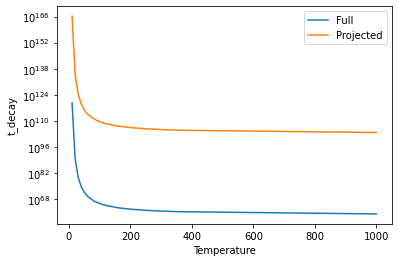

In [377]:
Temp = [10, 20, 30, 40, 50, 60,80, 100, 120, 160, 200, 250, 300, 360, 1000]
t_decay_full = []
t_decay_proj = []
for t in Temp:
    t_decay_full.append(decay_time(eng, G2D, freq, t))
    t_decay_proj.append(decay_time(eng, gprime.transpose(), np.sqrt(evals_s), t))

plt.figure()
plt.plot(Temp, t_decay_full, Temp, t_decay_proj)
plt.legend(['Full', 'Projected'])
plt.yscale('log')
plt.xlabel('Temperature')
plt.ylabel('t_decay')
plt.show()


In [359]:
0.05*(eng[1]-eng[0])/hbar

0.007824227350755221

In [348]:
for x in freq:
    print(x*((eng[1]-eng[0])/hbar))

0.0017578848073488767
0.0017730638084093417
0.0017838768906080855
0.0017964425997333985
0.0018254704832047003
0.001857127307065856
0.001857127307065856
0.00188825208346716
0.001915902902924729
0.001927607947041459
0.0019375603642316195
0.0019513310043689487
0.028323703009733893
0.028480187556748998
0.028636672103764103
0.02879315665077921
0.02926261029182452
0.029732063932869836
0.029732063932869836
0.03020151757391515
0.03067097121496046
0.030827455761975566
0.03098394030899067
0.03129690940302088


In [349]:
for x in np.sqrt(evals_s):
    print(x*(eng[1]-eng[0])/hbar)

0.02967601581820293
0.030353502690300113
0.030862353684031313
